In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
import scipy as sp

# 问题1

连续时间随机游走与意见动力学

本作业的第一个问题分为两个部分。第一部分重点分析单个粒子在网络中执行连续时间随机游走的行为。网络由图G表示，节点标记为o、a、b、c和d。粒子在节点间的移动由转移速率矩阵Λ控制，如下所述：

In [196]:
# 先建立可达矩阵
lambda_matrix = np.array([[0,2/5,1/5,0,0],
                         [0,0,3/4,1/4,0],
                         [1/2,0,0,1/3,0],
                         [0,0,1/3,0,2/3],
                         [0,1/2,0,1/3,0]]
                        )

# 定义节点名称列表
node = ['o', 'a', 'b', 'c', 'd']
# 创建有向图
G = nx.DiGraph()
# 添加节点
G.add_nodes_from(node)
# 添加边和权重
for i in range(len(node)):
    for j in range(len(node)):
        if lambda_matrix[i][j] > 0:
            G.add_edge(node[i], node[j], weight=lambda_matrix[i][j])

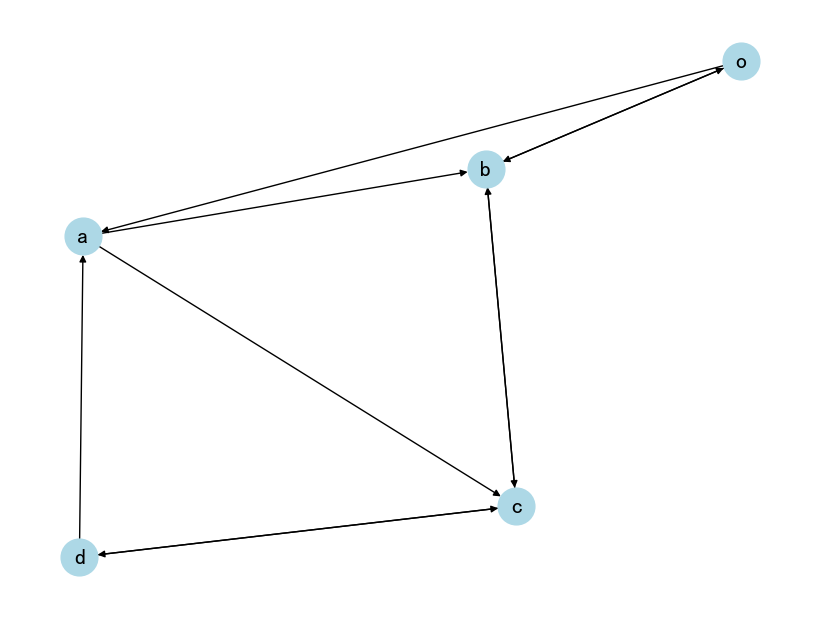

In [197]:
# 绘制有向图
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # 使用 spring 布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black', arrows=True)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=14)
plt.axis('off')  # 关闭坐标轴
plt.show()

## task1

使用模拟方法计算粒子从节点a开始，离开该节点后再返回节点a所需的平均时间。

---

In [198]:
# 计算从节点a的离开速率
lambda_a = sum(lambda_matrix[1, :])  # 节点a的索引是1
print(f"从节点a的离开速率 λ_a = {lambda_a}")

# 计算从a可以转移到的节点及其概率
print(f"\n从节点a可以转移到的节点:")
transition_probs = lambda_matrix[1, :] / lambda_a
for i, prob in enumerate(transition_probs):
    if prob > 0:
        print(f"到节点 {node[i]}: 概率 = {prob:.4f} (速率 = {lambda_matrix[1, i]})")

# 计算在节点a的平均停留时间
mean_stay_time = 1 / lambda_a
print(f"\n在节点a的平均停留时间 = {mean_stay_time:.4f}")

从节点a的离开速率 λ_a = 1.0

从节点a可以转移到的节点:
到节点 b: 概率 = 0.7500 (速率 = 0.75)
到节点 c: 概率 = 0.2500 (速率 = 0.25)

在节点a的平均停留时间 = 1.0000


In [199]:
def simulate_single_return_time():
    """
    模拟从节点a开始，离开后再返回的单次时间
    返回：总的返回时间
    """
    total_time = 0
    current_node_idx = 1  # 从节点a开始（索引为1）
    
    # 第一步：从节点a离开
    # 计算在节点a的停留时间
    stay_time = np.random.exponential(1 / lambda_a)
    total_time += stay_time
    
    # 选择下一个节点
    transition_probs = lambda_matrix[1, :] / lambda_a
    next_node_idx = np.random.choice(len(node), p=transition_probs)
    current_node_idx = next_node_idx
    
    # 第二步：随机游走直到返回节点a
    while current_node_idx != 1:  # 直到回到节点a（索引为1）
        # 计算当前节点的离开速率
        current_lambda = sum(lambda_matrix[current_node_idx, :])
        
        # 生成停留时间
        stay_time = np.random.exponential(1 / current_lambda)
        total_time += stay_time
        
        # 选择下一个节点
        transition_probs = lambda_matrix[current_node_idx, :] / current_lambda
        next_node_idx = np.random.choice(len(node), p=transition_probs)
        current_node_idx = next_node_idx
    
    return total_time

# 测试函数
return_time = simulate_single_return_time()
print(f"单次返回时间: {return_time:.4f}")

单次返回时间: 5.5115


In [200]:
def simulate_average_return_time(num_simulations=10000):
    """
    模拟多次返回时间并计算平均值
    """
    return_times = []
    
    for i in range(num_simulations):
        return_time = simulate_single_return_time()
        return_times.append(return_time)
        
        # # 每1000次显示进度
        # if (i + 1) % 1000 == 0:
        #     print(f"已完成 {i + 1}/{num_simulations} 次模拟")
    
    return_times = np.array(return_times)
    
    print(f"\n=== 模拟结果 ===")
    print(f"模拟次数: {num_simulations}")
    print(f"平均返回时间: {np.mean(return_times):.4f}")
    print(f"标准差: {np.std(return_times):.4f}")
    print(f"最小值: {np.min(return_times):.4f}")
    print(f"最大值: {np.max(return_times):.4f}")
    
    return return_times

# 运行模拟
return_times = simulate_average_return_time(10000)


=== 模拟结果 ===
模拟次数: 10000
平均返回时间: 6.1068
标准差: 4.3060
最小值: 0.2337
最大值: 47.4557


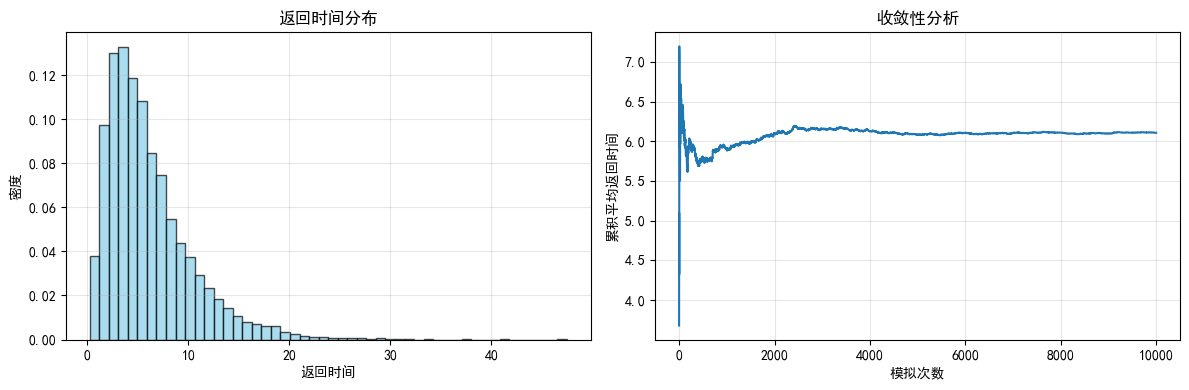

In [201]:
# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制返回时间分布
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(return_times, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('返回时间')
plt.ylabel('密度')
plt.title('返回时间分布')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(return_times) / np.arange(1, len(return_times) + 1))
plt.xlabel('模拟次数')
plt.ylabel('累积平均返回时间')
plt.title('收敛性分析')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

标准答案：

1.全局时钟均匀化

$\omega_i = \sum_{j \neq i} \lambda_{ij}$ 是节点 $i$ 的离开速率

$\omega^* = \max_i \omega_i$ 是全局最大离开速率

关键洞察：要将所有节点的离开速率"标准化"到相同的值 $\omega^*$

2.原始CTMC的生成矩阵

$$Q_{ij} = \begin{cases} \lambda_{ij} & \text{if } i \neq j\\ 
\ -\omega_i & \text{if } i = j\end{cases}$$

均匀化后的转移概率矩阵

$$ \bar{P}_{ij} = \begin{cases} \frac{\lambda_{ij}}{\omega^*} & \text{if } i \neq j 
\\ 1 - \frac{\omega_i}{\omega^*} & \text{if } i = j \end{cases}$$

In [ ]:
# 转移速率矩阵
Lambda = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/2, 0, 1/3, 0]
])

# 节点及其索引
nodes = ['o', 'a', 'b', 'c', 'd']
node_indices = {node: idx for idx, node in enumerate(nodes)}
inv_node_indices = {v: k for k, v in node_indices.items()}

# 计算全局泊松时钟速率omega_star
omega = np.sum(Lambda, axis=1)  # 计算每个节点的总离开速率，按行求和
omega_star = np.max(omega)

# 计算转移概率矩阵P_bar
P_ij = Lambda/omega_star 
P_ii = np.diag(np.ones(len(omega))-np.sum(P_ij,axis=1))
P_bar = P_ij + P_ii

In [203]:
np.diag(np.ones(len(omega)))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [204]:
P_ij

array([[0.        , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.33333333, 0.        ]])

In [205]:
P_ii

array([[0.4       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.16666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16666667]])

In [206]:
P_bar

array([[0.4       , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.16666667, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.33333333, 0.16666667]])

In [207]:
def get_particle_simulation_time(source='a', target='a', num_simulations=10000):
    transition_times = []
    
    for _ in range(num_simulations):
        current_node = node_indices[source]
        cumulative_time = 0.0
        
        while True:
            # 全局泊松时钟
            t_next = -np.log(np.random.rand()) / omega_star
            cumulative_time += t_next
            
            # 根据P_bar进行状态转移
            next_node = np.random.choice(len(P_bar), p=P_bar[current_node, :])
            current_node = next_node
            
            # 检查是否返回目标节点
            if current_node == node_indices[target]:
                transition_times.append(cumulative_time)
                break
    
    return np.mean(transition_times)

print("Simulated average return time on node a:", get_particle_simulation_time('a', 'a'))

Simulated average return time on node a: 6.029524821514591


## task2

将模拟返回时间与理论返回时间 $E_{a}[T_{a}^{+}]$ 进行比较。

In [208]:
### 计算理论返回时间 E_a[T_a^+]
def compute_stationary_distribution(P):
    """计算转移矩阵P的平稳分布"""
    values, vectors = np.linalg.eig(P.T)
    index = np.argmax(values.real)  # 主特征值（接近1）
    pi = vectors[:, index].real
    pi = pi / np.sum(pi)  # 归一化得到概率
    return pi

pi_bar = compute_stationary_distribution(P_bar)

# 节点'a'的理论返回时间
node_a = node_indices['a']
E_a_T_a = 1 / (omega[node_a] * pi_bar[node_a])

print("理论返回时间 E_a[T_a^+]:", E_a_T_a)

理论返回时间 E_a[T_a^+]: 6.0588235294117645


In [209]:
### 模拟多次返回时间
simulation_value_list = []
num_simulations_list = range(100, 10000, 200)
for num in num_simulations_list:
    simulation_value_list.append(get_particle_simulation_time(source='a', target='a', num_simulations=num))

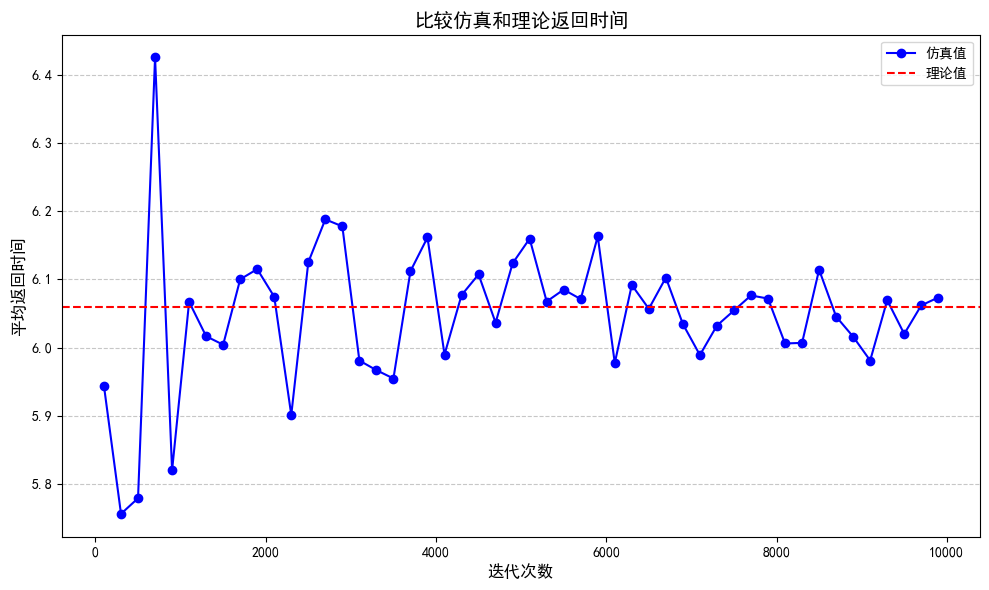

In [ ]:
### 绘制仿真结果并与理论值进行比较
plt.figure(figsize=(10, 6))
plt.plot(num_simulations_list, simulation_value_list, label='仿真值', marker='o', linestyle='-', color='blue')
plt.axhline(y=E_a_T_a, color='red', linestyle='--', label='理论值')

# 添加标签、图例和标题
plt.xlabel('迭代次数', fontsize=12)
plt.ylabel('平均返回时间', fontsize=12)
plt.title('仿真和理论返回时间的比较', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()


## 任务3
从节点 o 到节点 d 的仿真击中时间

In [211]:
### 使用全局泊松时钟进行击中时间仿真
simulated_hitting_time = get_particle_simulation_time(source='o', target='d')
print("从节点o到节点d的仿真平均击中时间:", simulated_hitting_time)

从节点o到节点d的仿真平均击中时间: 10.800749383954544


## task4

Comparison Between Simulated and Theoretical Hitting Times

In [212]:
# Compute the theoretical hitting time Eo[Td]
# 设置目标节点
target_node = node_indices['d']
# 从转移矩阵P_bar中移除目标节点
p_reduced = np.delete(np.delete(P_bar, target_node, axis=0),  target_node, axis=1)
# 求解排除目标节点后的线性方程组从而计算理论击中时间
n = p_reduced.shape[0]
I = np.eye(n)
b = np.ones(n)  / omega_star
# 计算排除目标节点d后的所有节点的理论击中时间
h_reduced = np.linalg.solve(I - p_reduced, b)
# 插入目标节点的理论击中时间为0(因为目标节点不需要时间到达)
h = np.insert(h_reduced, target_node, 0)
# 计算从节点o到节点d的理论击中时间
E_o_T_d = h[node_indices['o']]
print("Theoretical hitting time Eo[Td]:", E_o_T_d)

Theoretical hitting time Eo[Td]: 10.766666666666666


In [213]:
h_reduced

array([10.76666667,  9.        ,  9.3       ,  4.1       ])

In [214]:
### Simulate many hitting-times
simulation_value_list = []
num_simulations_list = range(100, 10000, 200)
for num in num_simulations_list:
    simulation_value_list.append(get_particle_simulation_time(source='o', target='d',num_simulations=num))

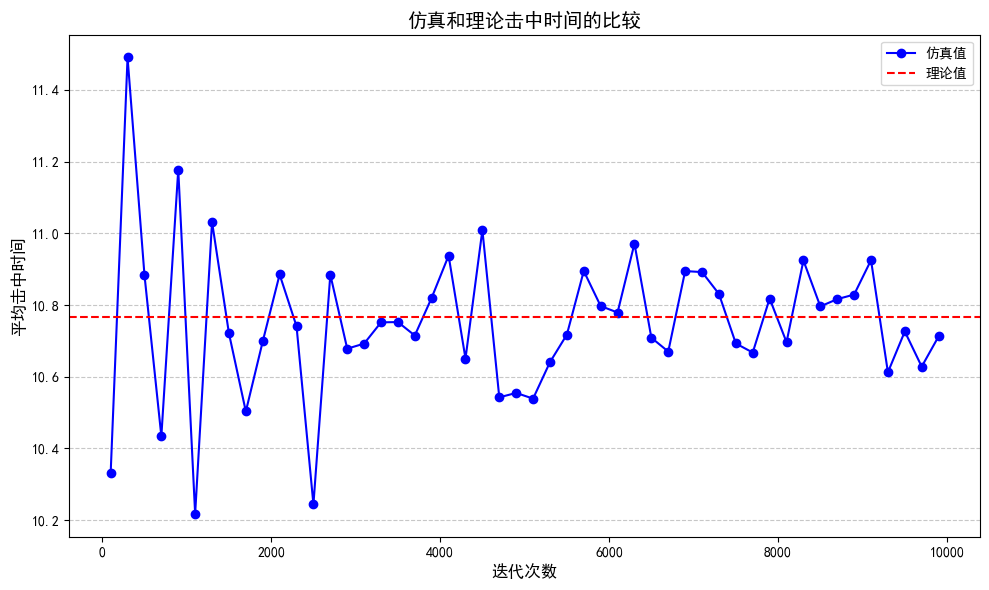

In [215]:
### 绘制仿真结果并与理论值比较
plt.figure(figsize=(10, 6))
plt.plot(num_simulations_list, simulation_value_list, label='仿真值', marker='o', linestyle='-', color='blue')
plt.axhline(y=E_o_T_d, color='red', linestyle='--', label='理论值')

# 添加标签、图例和标题
plt.xlabel('迭代次数', fontsize=12)
plt.ylabel('平均击中时间', fontsize=12)
plt.title('仿真和理论击中时间的比较', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

## 任务5

## 任务5

French-DeGroot动力学的模拟与共识行为

将矩阵Λ解释为图 $G=(V,E,\Lambda)$ 的权重矩阵，并在 $G$ 上使用任意初始条件 $x(0)$ 模拟French-DeGroot动力学。动力学是否会对每个初始条件 $x(0)$ 收敛到共识状态？请说明理由。

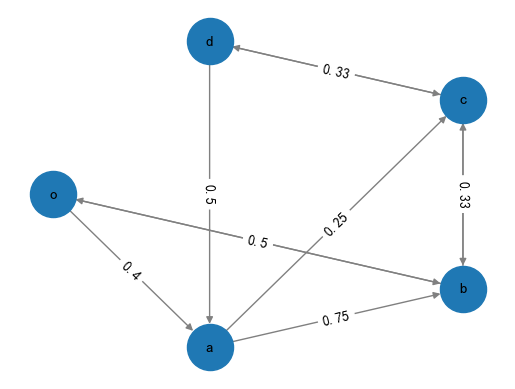

In [216]:
### 定义图

# 从Lambda矩阵创建图
def create_graph_from_lambda(Lambda, nodes):
    G = nx.DiGraph()
    for i, node in enumerate(nodes):
        for j, target in enumerate(nodes):
            if Lambda[i, j] > 0:  # 只添加权重非零的边
                G.add_edge(node, target, weight=round(Lambda[i, j], 2))
    return G

G = create_graph_from_lambda(Lambda, nodes)

# 绘制图
def plot_graph(G):
    pos = nx.shell_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=labels,
        font_color='red',
        font_size=10
    )
    nx.draw(G, pos, with_labels=True, node_size=1100, font_size=11, edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

plot_graph(G)

In [217]:
### 检查图是否强连通
if nx.is_strongly_connected(G):
    print("图是强连通的。")
else:
    print("图不是强连通的。")

图是强连通的。


In [218]:
### 检查图是否非周期的
if nx.is_aperiodic(G):
    print("The graph is aperiodic")
else:
    print("The graph is not aperiodic")

The graph is aperiodic


In [219]:
A = nx.adjacency_matrix(G).toarray()

A

array([[0.  , 0.4 , 0.2 , 0.  , 0.  ],
       [0.  , 0.  , 0.75, 0.25, 0.  ],
       [0.5 , 0.  , 0.  , 0.33, 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.67],
       [0.  , 0.5 , 0.  , 0.33, 0.  ]])

In [220]:
np.sum(A, axis=1)

array([0.6 , 1.  , 0.83, 1.  , 0.83])

In [221]:
D = np.diag(omega)
D

array([[0.6       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.83333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.83333333]])

In [222]:
np.linalg.inv(D) @ A

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.6       , 0.        , 0.        , 0.396     , 0.        ],
       [0.        , 0.        , 0.33      , 0.        , 0.67      ],
       [0.        , 0.6       , 0.        , 0.396     , 0.        ]])

In [223]:
### 检查French-DeGroot动力学是否对每个初始条件x(0)都收敛到共识状态

# 计算转移矩阵P
def compute_P(G):  
    A = nx.adjacency_matrix(G).toarray()  # 将邻接矩阵转换为numpy数组
    omega = np.sum(A, axis=1)  # 计算每个节点的出度
    D = np.diag(omega)
    return np.linalg.inv(D) @ A  # 行随机矩阵P

# 模拟French-DeGroot动力学
def french_degroot(G, x0, steps=50):
    P = compute_P(G)
    opinions = x0
    opinions_over_time = [opinions]
    for _ in range(steps):
        opinions = P @ opinions  # 更新观点
        opinions_over_time.append(opinions)
    return np.array(opinions_over_time)

n_conditions = 100
n_consensus = 0

for _ in range(n_conditions):
    initial_opinions = np.random.rand(5)
    opinions_over_time = french_degroot(G, initial_opinions)
    opinions = opinions_over_time[-1]

    if np.allclose(opinions, opinions[0], atol=1e-8):
        n_consensus += 1

if n_consensus == n_conditions:
    print("动力学已收敛到共识状态。")
else:
    print("动力学未收敛到共识状态。")

动力学已收敛到共识状态。


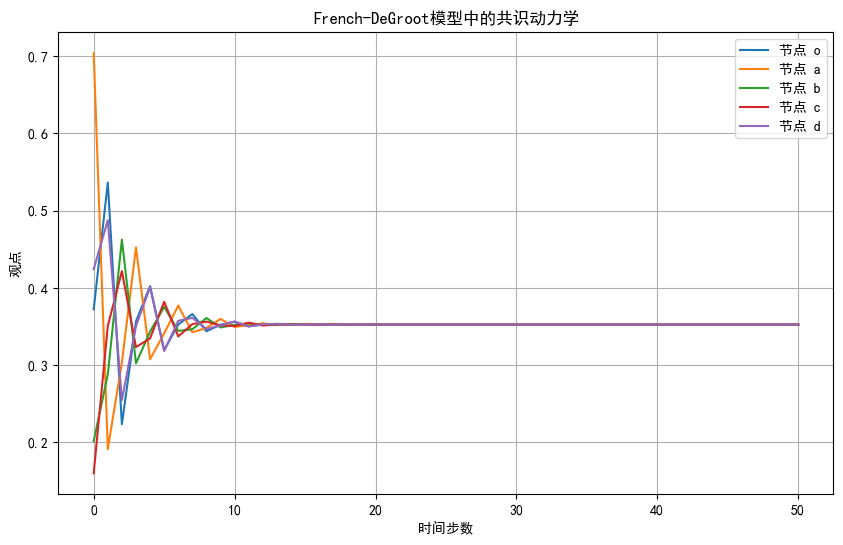

In [224]:
### 绘制每个节点观点随时间变化的动态图
plt.figure(figsize=(10, 6))
for i in range(opinions_over_time.shape[1]):
    plt.plot(opinions_over_time[:, i], label=f'节点 {inv_node_indices[i]}')

plt.xlabel("时间步数")
plt.ylabel("观点")
plt.title("French-DeGroot模型中的共识动力学")
plt.legend()
plt.grid(True)
plt.show()

## 任务6

共识值的方差及数值比较

假设每个节点 $i \in V$ 的动力学初始状态由 $x_i(0) = ξ_i$ 给出，其中 $\{ξ_i\}_{i \in V}$ 是具有方差的独立随机变量
$$\sigma^2_a = \sigma^2_b = \sigma^2_c = 2, \sigma^2_o = \sigma^2_d = 1$$
计算共识值的方差，并将结果与数值模拟进行比较。

In [225]:
### Theoretical variance of the consensus

P = compute_P(G)
pi = compute_stationary_distribution(P)

# 定义各节点的初始方差：o和d的方差为1，a、b、c的方差为2
variances = np.array([1, 2, 2, 2, 1])

# 计算共识值的理论方差
theoretical_var = np.sum(pi**2 * variances)
print("Theoretical variance of the consensus:", theoretical_var)

Theoretical variance of the consensus: 0.3717260182155833


In [226]:
### 模拟共识值的方差

num_simulations = 10000
consensus_values = []

for _ in range(num_simulations):
    # 根据给定的方差生成随机初始条件
    initial_opinions = np.random.normal(0, np.sqrt(variances))
    
    # 模拟到共识状态
    opinions = french_degroot(G, initial_opinions)[-1]
    
    # 存储共识值
    consensus_values.append(opinions[0])  # 任意索引都可以，因为所有值都相等

simulated_var = np.var(consensus_values)
print("模拟的共识方差:", simulated_var)

模拟的共识方差: 0.37403968168466406


## 任务7

French-DeGroot动力学中移除边后的渐近行为

移除边 (d,a)、(d,c)、(a,c)、(b,c)。描述并解释动力学的渐近行为。如果动力学收敛到渐近状态，该状态如何与初始条件 x(0) 相关？

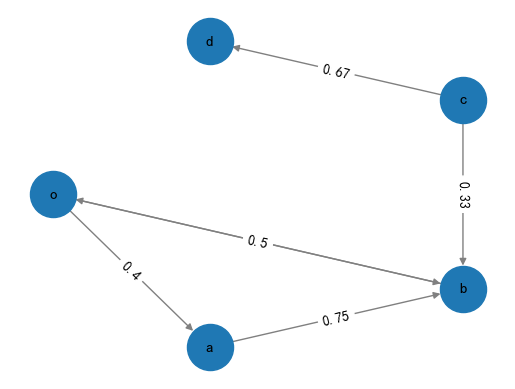

In [227]:
### 从图G中移除以下边: (d,a),(d,c),(a,c),(b,c)
edges_to_remove_g = [('d', 'a'), ('d', 'c'), ('a', 'c'), ('b', 'c')]

G_modified_g = G.copy()
G_modified_g.remove_edges_from(edges_to_remove_g)
plot_graph(G_modified_g)

图不是强连通的。


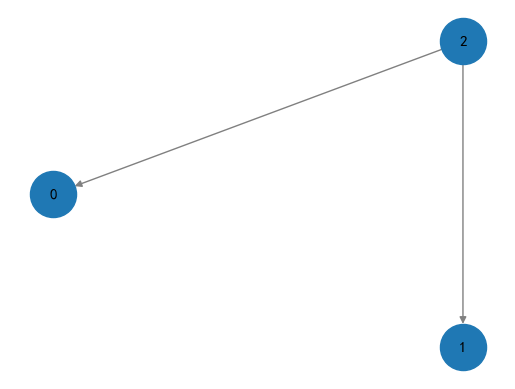

In [228]:
### 检查图是否强连通
if nx.is_strongly_connected(G_modified_g):
    print("图是强连通的。")
else:
    print("图不是强连通的。")

# 绘制压缩图
plot_graph(nx.condensation(G_modified_g))

In [229]:
### 检查强连通分量
sccs = list(nx.strongly_connected_components(G_modified_g))
print("强连通分量:", sccs)

# 验证影响结构
for scc in sccs:
    print(f"\n分量 {scc}:")
    scc_subgraph = G_modified_g.subgraph(scc)
    if len(scc) > 1:  # 只对包含多个节点的分量检查非周期性
        if nx.is_aperiodic(scc_subgraph):
            print("该分量是非周期的")
        else:
            print("该分量不是非周期的")
    else:
        print("单节点分量")
    print("受以下节点影响:", set.union(*[set(G_modified_g.predecessors(n)) - scc for n in scc]))
    print("影响以下节点:", set.union(*[set(G_modified_g.successors(n)) - scc for n in scc]))

强连通分量: [{'a', 'o', 'b'}, {'d'}, {'c'}]

分量 {'a', 'o', 'b'}:
该分量是非周期的
受以下节点影响: {'c'}
影响以下节点: set()

分量 {'d'}:
单节点分量
受以下节点影响: {'c'}
影响以下节点: set()

分量 {'c'}:
单节点分量
受以下节点影响: set()
影响以下节点: {'d', 'b'}


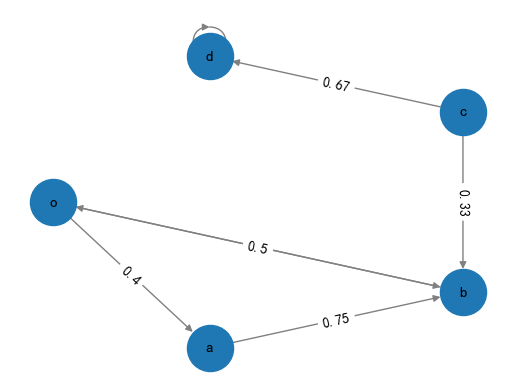

In [230]:
### 为节点'd'添加自环，因为它的出度为0
G_modified_g.add_edge('d','d')
plot_graph(G_modified_g)

In [231]:
### 模拟French-DeGroot动力学
initial_opinions = np.random.rand(5)

opinions_over_time_g = french_degroot(G_modified_g, initial_opinions, steps=50)
opinions_modified_g = opinions_over_time_g[-1]
print("移除边后的初始观点 (g):", initial_opinions)
print("移除边后的最终观点 (g):", opinions_modified_g)
if np.allclose(opinions_modified_g, opinions_modified_g[0], atol=1e-5):
    print("动力学 (g) 收敛到共识状态。")
else:
    print("动力学 (g) 未收敛到共识状态。")

移除边后的初始观点 (g): [0.7103924  0.05745469 0.2705138  0.36684218 0.77426371]
移除边后的最终观点 (g): [0.38220855 0.38222074 0.38218695 0.64488953 0.77426371]
动力学 (g) 未收敛到共识状态。


In [232]:
### 检查是否满足以下条件：
# - 强连通分量 (o,a,b) 在所有初始条件 x(0) 下都能达到共识
# - 节点 'd' 的观点随时间保持恒定

n_initial_conditions = 100
n_oab_consensus = 0
n_d_fixed = 0

for _ in range(n_initial_conditions):
    
    initial_opinions = np.random.rand(5)
    final_opinions = french_degroot(G_modified_g, initial_opinions, steps=100)[-1]

    # 检查节点 'd' 是否随时间保持恒定观点
    if final_opinions[-1] == initial_opinions[-1]:
        n_d_fixed += 1
    
    # 检查强连通分量 (o, a, b) 中的所有节点是否达到共识
    oab_opinions = final_opinions[:3]
    if all(abs(c - oab_opinions[0]) < 1e-8 for c in oab_opinions):
        n_oab_consensus += 1

# 检查节点 'd' 在所有初始条件下是否都保持固定观点
if n_initial_conditions == n_d_fixed:
    print("节点 'd' 的观点在所有初始条件下都保持恒定。")
else:
    print(f"节点 'd' 的观点在 {n_initial_conditions - n_d_fixed} 个初始条件下未保持恒定。")
    
# 检查强连通分量 (o, a, b) 在所有初始条件下是否都达到共识
if n_initial_conditions == n_oab_consensus:
    print("强连通分量 (o, a, b) 在每个初始条件下都达到了共识。")
else:
    print(f"强连通分量 (o, a, b) 在 {n_initial_conditions - n_oab_consensus} 个初始条件下未达到共识。")

节点 'd' 的观点在所有初始条件下都保持恒定。
强连通分量 (o, a, b) 在每个初始条件下都达到了共识。


In [233]:
### 检查当节点d的观点为0时，节点c的观点是否约等于强连通分量(o,a,b)共识值的1/3

n_initial_conditions = 100
n_satisfied_conditions = 0

for _ in range(n_initial_conditions):
    
    initial_opinions = np.random.rand(4)
    initial_opinions = np.concatenate((initial_opinions, [0]))
    
    final_opinions = french_degroot(G_modified_g, initial_opinions, steps=100)[-1]

    # 提取强连通分量(o,a,b)的共识观点和节点c的观点
    oab_consensus = final_opinions[0]  # 强连通分量中任意节点的观点都相同
    c_opinion = final_opinions[3]
    
    # 检查节点c的观点是否约等于强连通分量(o,a,b)共识值的1/3
    if abs(c_opinion - oab_consensus/3) <= 1e-2:
        n_satisfied_conditions += 1
    

# 检查节点c的观点是否约等于强连通分量(o,a,b)共识值的1/3
if n_initial_conditions == n_satisfied_conditions:
    print("如果节点'd'的初始观点为0，那么在所有初始条件下，\n节点'c'的最终观点都约等于强连通分量(o,a,b)共识值的三分之一。")
else:
    print(f"有 {n_initial_conditions - n_satisfied_conditions} 个初始条件不满足此条件。")

如果节点'd'的初始观点为0，那么在所有初始条件下，
节点'c'的最终观点都约等于强连通分量(o,a,b)共识值的三分之一。


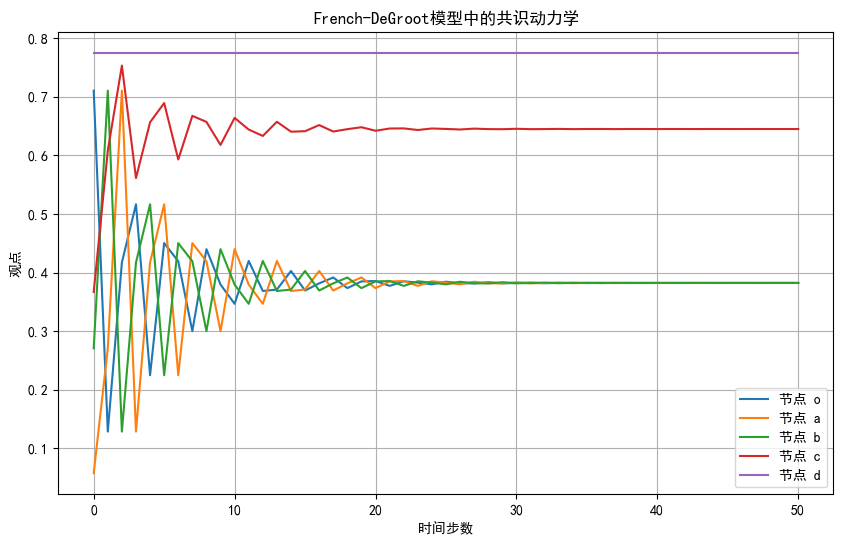

In [234]:
###  绘制每个节点观点随时间变化的动态图
plt.figure(figsize=(10, 6))
for i in range(opinions_over_time_g.shape[1]):
    plt.plot(opinions_over_time_g[:, i], label=f'节点 {inv_node_indices[i]}')

plt.xlabel("时间步数")
plt.ylabel("观点")
plt.title("French-DeGroot模型中的共识动力学")
plt.legend()
plt.grid(True)
plt.show()

## 任务8

修改图的分析与渐近状态的演化

考虑图 (V,E,Λ)，移除边 (b,o) 和 (d,a)。分析新图上的 French-DeGroot 动力学。特别是，描述动力学的渐近行为如何随初始条件 x(0) 的变化而变化，并说明理由。

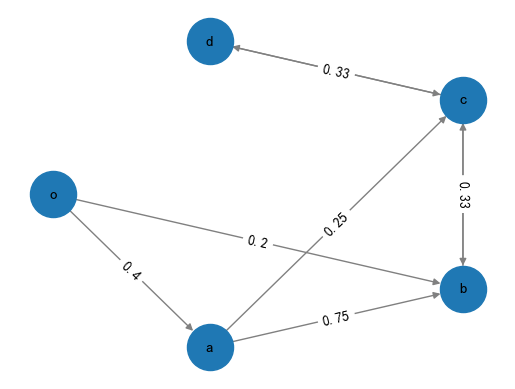

In [235]:
### 从图G中移除以下边: (b,o), (d,a)
edges_to_remove_h = [('b', 'o'), ('d', 'a')]

G_modified_h = G.copy()
G_modified_h.remove_edges_from(edges_to_remove_h)
plot_graph(G_modified_h)

图不是强连通的。


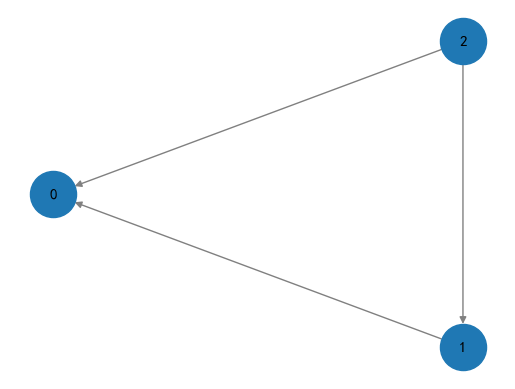

In [236]:
### 检查图是否强连通
if nx.is_strongly_connected(G_modified_h):
    print("图是强连通的。")
else:
    print("图不是强连通的。")

# 绘制压缩图
plot_graph(nx.condensation(G_modified_h))

In [237]:
### 检查强连通分量
sccs = list(nx.strongly_connected_components(G_modified_h))
print("强连通分量:", sccs)

# 验证影响结构
for scc in sccs:
    print(f"\n分量 {scc}:")
    scc_subgraph = G_modified_h.subgraph(scc)
    if len(scc) > 1:  # 只对包含多个节点的分量检查非周期性
        if nx.is_aperiodic(scc_subgraph):
            print("该分量是非周期的")
        else:
            print("该分量不是非周期的")
    else:
        print("单节点分量")
    print("受以下节点影响:", set.union(*[set(G_modified_h.predecessors(n)) - scc for n in scc]) if any(set(G_modified_h.predecessors(n)) - scc for n in scc) else set())
    print("影响以下节点:", set.union(*[set(G_modified_h.successors(n)) - scc for n in scc]) if any(set(G_modified_h.successors(n)) - scc for n in scc) else set())

### 模拟French-DeGroot动力学
initial_opinions = np.random.rand(5)
opinions_over_time_h = french_degroot(G_modified_h, initial_opinions, steps=50)

强连通分量: [{'d', 'c', 'b'}, {'a'}, {'o'}]

分量 {'d', 'c', 'b'}:
该分量不是非周期的
受以下节点影响: {'a', 'o'}
影响以下节点: set()

分量 {'a'}:
单节点分量
受以下节点影响: {'o'}
影响以下节点: {'c', 'b'}

分量 {'o'}:
单节点分量
受以下节点影响: set()
影响以下节点: {'a', 'b'}


In [238]:
### 模拟French-DeGroot动力学
initial_opinions = np.random.rand(5)
opinions_over_time_h = french_degroot(G_modified_h, initial_opinions, steps=100)
opinions_modified_h = opinions_over_time_h[-1]
print("移除边后的初始观点 (h):", initial_opinions)
print("移除边后的最终观点 (h):", opinions_modified_h)
if np.allclose(opinions_modified_h, opinions_modified_h[0], atol=1e-5):
    print("动力学 (h) 收敛到共识状态。")
else:
    print("动力学 (h) 未收敛到共识状态。")

移除边后的初始观点 (h): [0.99862202 0.30887775 0.84643506 0.74164904 0.44695674]
移除边后的最终观点 (h): [0.66021682 0.70093293 0.57878459 0.74164904 0.57878459]
动力学 (h) 未收敛到共识状态。


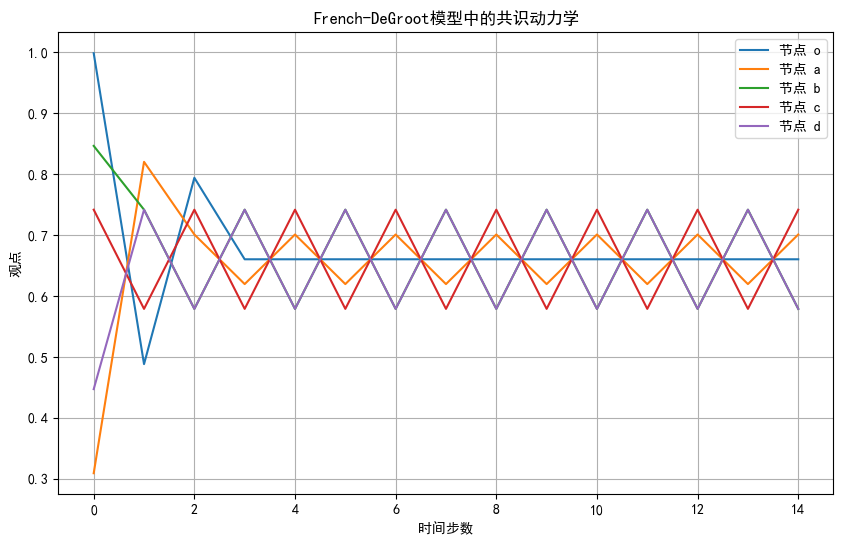

In [239]:
###  绘制每个节点观点随时间变化的动态图（放大显示前15个时间步）
plt.figure(figsize=(10, 6))
for i in range(opinions_over_time_h.shape[1]):
    plt.plot(opinions_over_time_h[:15, i], label=f'节点 {inv_node_indices[i]}')

plt.xlabel("时间步数")
plt.ylabel("观点")
plt.title("French-DeGroot模型中的共识动力学")
plt.legend()
plt.grid(True)
plt.show()

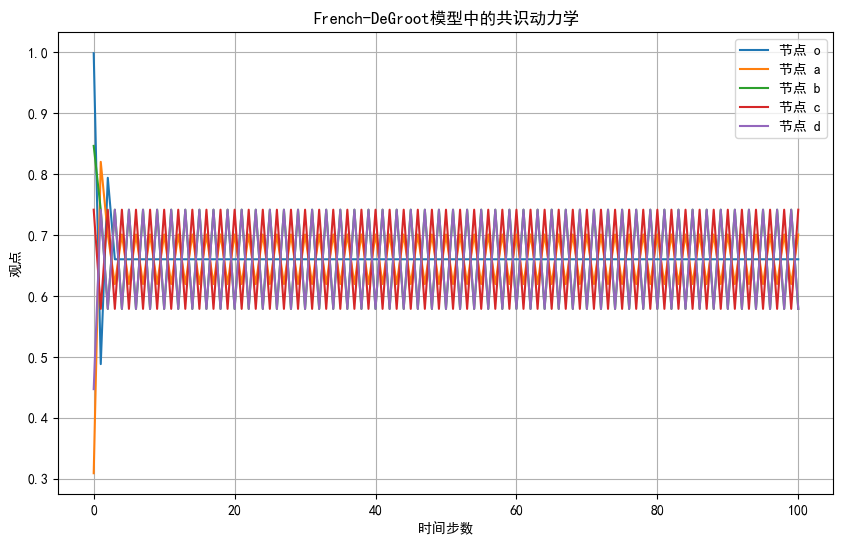

In [240]:
###  绘制每个节点观点随时间变化的动态图
plt.figure(figsize=(10, 6))
for i in range(opinions_over_time_h.shape[1]):
    plt.plot(opinions_over_time_h[:, i], label=f'节点 {inv_node_indices[i]}')

plt.xlabel("时间步数")
plt.ylabel("观点")
plt.title("French-DeGroot模型中的共识动力学")
plt.legend()
plt.grid(True)
plt.show()

In [241]:
### 模拟French-DeGroot动力学（极限情况）
initial_opinions = np.array([0.2,1,0.5,0.5,0.5])
opinions_over_time_h = french_degroot(G_modified_h, initial_opinions, steps=100)
opinions_modified_h = opinions_over_time_h[-1]
print("移除边后的初始观点 (h):", initial_opinions)
print("移除边后的最终观点 (h):", opinions_modified_h)
if np.allclose(opinions_modified_h, opinions_modified_h[0], atol=1e-5):
    print("动力学 (h) 收敛到共识状态。")
else:
    print("动力学 (h) 未收敛到共识状态。")

移除边后的初始观点 (h): [0.2 1.  0.5 0.5 0.5]
移除边后的最终观点 (h): [0.5 0.5 0.5 0.5 0.5]
动力学 (h) 收敛到共识状态。


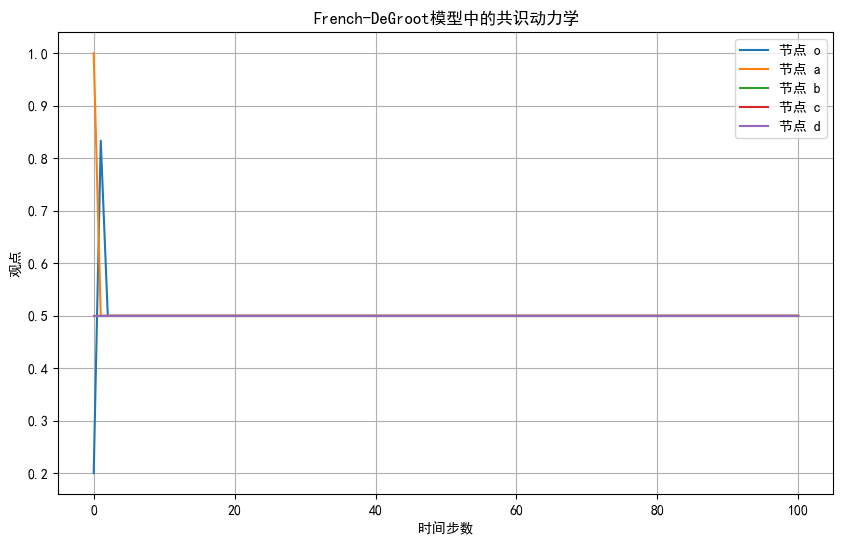

In [242]:
###  绘制每个节点观点随时间变化的动态图
plt.figure(figsize=(10, 6))
for i in range(opinions_over_time_h.shape[1]):
    plt.plot(opinions_over_time_h[:, i], label=f'节点 {inv_node_indices[i]}')

plt.xlabel("时间步数")
plt.ylabel("观点")
plt.title("French-DeGroot模型中的共识动力学")
plt.legend()
plt.grid(True)
plt.show()